# Group assignment

## Energy data analysis

In this assignment, you will work with the `energy.csv` dataset, containing **hourly** data of energy consumption and generation in Spain. This dataset also contains the spot price of electricity.

### Rules for the assignment:

* Deadline: December 6th, 2022, 11pm.
* The group assignment's grade will be graded on the following criteria:
    * 50 %: presentation during Sessions 19 or 20
    * 50 %: answering questions during presentations
* Submission: 1 zip file containing:
    * 1 Jupyter notebook with your code: `group_assignment_group_X.ipynb`
    * 1 PDF file with your presentation
    * Not following these rules will result in a 0 grade for the assignment.
* No freeloaders during Group Assignments: if any of you see that any of your group members is not collaborating you tell me immediately. I will not accept excuses at the end of the course about the performance of any member.
* The presentation will be done by ONE (1) person chosen by the professor at random in the day of the presentations, so you all better work and collaborate to do a good job!
* All the students must be present during the presentations of the rest of the groups. 

### Type here the names of the members of your group

1. ...

### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [22]:
import pandas as pd
import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 

Use `map` to perform this operation. You can mix it with a `lambda` function.

### 2. Same but for months (1 point)

### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

<AxesSubplot:xlabel='hour'>

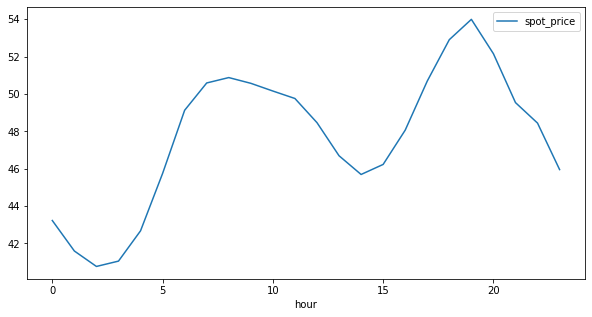

In [39]:
# plotting the average price for each hour of the day

df = energy.groupby("hour")["spot_price"].mean().to_frame().reset_index()
df.plot(x="hour", y="spot_price", figsize=(10, 5))

<AxesSubplot:xlabel='gas', ylabel='wind'>

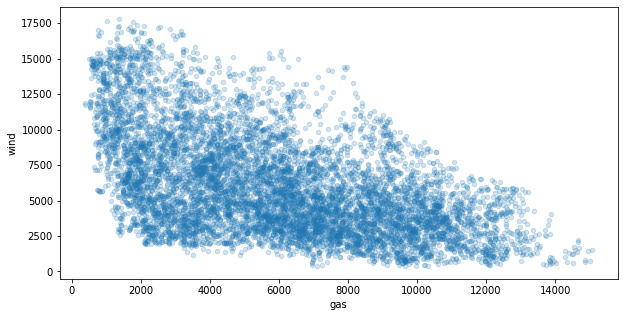

In [40]:
# plotting a scatterplot of gas vs wind generation

energy.plot(x="gas", y="wind", kind="scatter", figsize=(10, 5), alpha=0.2)